# Cloning quasars
Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)


<img src="https://classic.sdss.org/includes/sideimages/sdss_pie2.jpg" alt="SDSS Pie Chart" width="300">

Download the SDSS quasara data


- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

In [93]:
import numpy as np
from matplotlib import pylab as plt
import scipy.stats
from astroML.datasets import fetch_dr7_quasar
from scipy import stats, interpolate


# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

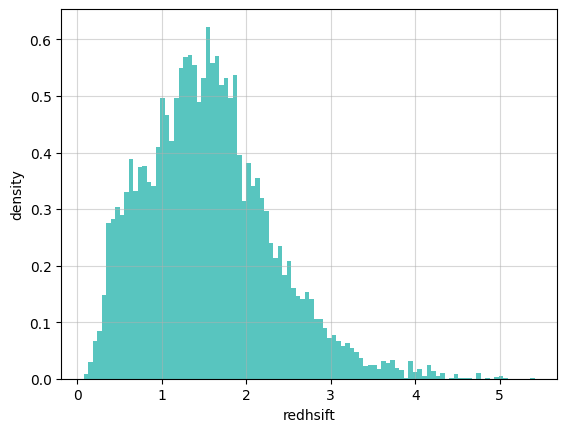

In [8]:
n_bins = 100
values = plt.hist(z, n_bins, density = True, color = "lightseagreen", alpha = 0.75)
plt.xlabel('redhsift')
plt.ylabel('density')
plt.grid(alpha = 0.5)
plt.show()

## Npw we want to upsample this distribution in two ways:
- ### rejection sampling
- ### inverse transform

In [20]:
print(values[1][1:], values[1])

[0.133533   0.186866   0.240199   0.29353198 0.346865   0.40019798
 0.453531   0.50686401 0.560197   0.61352998 0.66686296 0.72019601
 0.77352899 0.82686198 0.88019496 0.93352795 0.98686099 1.04019392
 1.09352696 1.14686    1.20019293 1.25352597 1.30685902 1.36019194
 1.41352499 1.46685791 1.52019095 1.573524   1.62685692 1.68018997
 1.73352289 1.78685594 1.84018898 1.8935219  1.94685495 2.00018787
 2.05352092 2.10685396 2.16018701 2.21352005 2.26685286 2.3201859
 2.37351894 2.42685199 2.48018503 2.53351784 2.58685088 2.64018393
 2.69351697 2.74685001 2.80018282 2.85351586 2.90684891 2.96018195
 3.013515   3.0668478  3.12018085 3.17351389 3.22684693 3.28017998
 3.33351278 3.38684583 3.44017887 3.49351192 3.54684496 3.600178
 3.65351081 3.70684385 3.7601769  3.81350994 3.86684299 3.92017579
 3.97350883 4.02684164 4.08017492 4.13350773 4.18684101 4.24017382
 4.2935071  4.3468399  4.40017271 4.45350599 4.5068388  4.56017208
 4.61350489 4.66683769 4.72017097 4.77350378 4.82683706 4.8801698

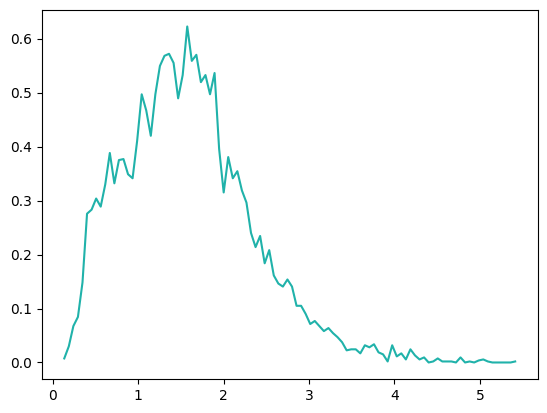

In [22]:
# values[1] is the redshift while values[0] is the value of the height of the histogram
plt.plot(values[1][1:], values[0], color = "lightseagreen")

## Rejection sampling

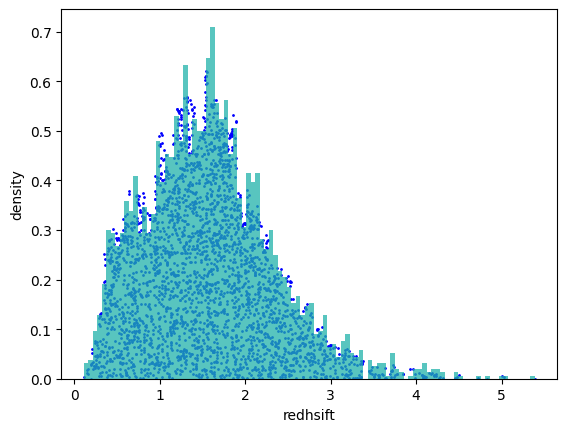

In [87]:
#try and catch
x = values[1]
y = values[0] #give me x and y   or maybe #rv_histogram(histogram, *args[, density])
x_min = min(values[1])
x_max = max(values[1])
y_min = min(values[0])
y_max = max(values[0])


x_i = np.random.uniform(x_min, x_max, 10000)
y_i = np.random.uniform(y_min, y_max, 10000)


selected_points = []
'''for i in range(len(x_i)):
    for j in range(len(values[1])-1):
        if (x_i[i] >= x[j] and x_i[i] < x[j+1]):
            if (y_i[i] < y[j]):
                selected_points.append((x_i[i], y_i[i]))
            break'''


selected_x= []
selected_y= []

'''for i in range(len(x)-1):
    if (x_i < x[i] & x_i > x[i+1]): # y_i deve essere minore di y
        if (y_i < y[i]):
            selected_points.append((x_i, y_i))
            break'''
    
    
for i in range(len(x_i)):
    for j in range(len(x) - 1):
        if x[j] <= x_i[i] < x[j + 1] and y_i[i] < y[j]:
            
            selected_x.append((x_i[i]))
            selected_y.append(y_i[i])
            break
   
plt.scatter(selected_x, selected_y, color = "blue", s = 1)


plt.hist(selected_x, bins = 100, density = True, color = "lightseagreen", alpha = 0.75)
plt.xlabel('redhsift')
plt.ylabel('density')

plt.show()


#x_i[]

#print(x_min)



## inverse transform sampling

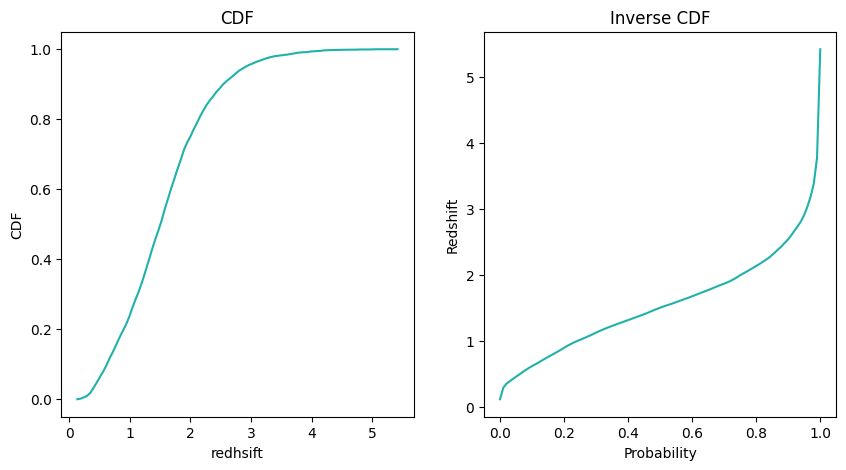

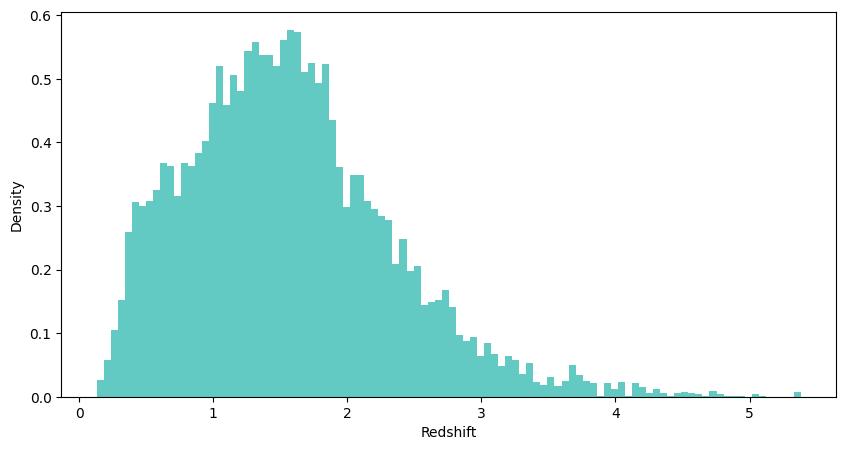

In [116]:
n_samples = 10000

# Calculate the cdf
cdf = np.cumsum(values[0])
cdf = cdf / cdf[-1]  # Normalize to ensure it ends at 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(values[1][1:], cdf, color = "lightseagreen")
plt.xlabel('redhsift')
plt.ylabel('CDF')
plt.title('CDF')

# Invert the CDF
inverse_cdf = interpolate.interp1d(cdf, values[1][1:], bounds_error=False, fill_value="extrapolate")

x_for_inverse = np.linspace(0, 1, 100)
y_for_inverse = inverse_cdf(x_for_inverse)
plt.subplot(1, 2, 2)
plt.plot(x_for_inverse, y_for_inverse, color="lightseagreen")

plt.xlabel('Probability')
plt.ylabel('Redshift')
plt.title('Inverse CDF')


# I generate samples from a uniform distribution and then use the inverse CDF to generate samples from the redshift distribution
u = np.random.uniform(0, 1, n_samples)
samples = inverse_cdf(u)

# Plot histogram of samples
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=100, density=True, alpha=0.7, color="lightseagreen")
plt.xlabel('Redshift')
plt.ylabel('Density')



u = np.random.uniform(0, 1, n_samples)
samples = inverse_cdf(u)
